In [3]:
import matplotlib.pyplot as plt
#import plotly.express as px
import pandas as pd
from pathlib import Path
import os
from pylab import MaxNLocator
import requests
import alpaca_trade_api as tradeapi
import numpy as np
import csv
#import hvplot.pandas
import datetime as dt

%matplotlib inline

In [4]:
from dotenv import load_dotenv
load_dotenv()

True

In [5]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [12]:
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-30", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["SQ","CRM","WDAY","ZEN"]


SaaS_threeyr_returns = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
SaaS_threeyr_returns.head()

CRM                                        SQ  \
                             open     high      low   close   volume   open   
time                                                                          
2018-01-02 00:00:00-05:00  102.88  104.700  102.270  104.38  3078922  34.70   
2018-01-03 00:00:00-05:00  104.87  106.140  104.620  105.32  2630909  36.43   
2018-01-04 00:00:00-05:00  106.00  107.660  105.765  106.68  2843490  38.30   
2018-01-05 00:00:00-05:00  107.76  108.295  107.200  108.07  2482769  38.39   
2018-01-08 00:00:00-05:00  108.00  109.140  107.570  108.82  2196919  41.00   

                                                              WDAY          \
                            high    low    close    volume    open    high   
time                                                                         
2018-01-02 00:00:00-05:00  36.24  34.68  36.1786  10359616  102.05  103.60   
2018-01-03 00:00:00-05:00  37.36  36.05  37.3100  10537507  103.88  105.90   
2018-01-04 00:00:00-05:00  38.66  37.40  38.1000  18843623  107.54  110.19   
2018-01-05 00:00:00-05:00  41.15  38.19  41.1400  28787543  109.94  109.94   
2018-01-08 00:00:00-05:00  41.91  39.81  40.7700  19693914  108.72  110.06   

                                                       ZEN                   \
                               low   close   volume   open     high     low   
time                                                                          
2018-01-02 00:00:00-05:00  100.240  103.40  1209932  33.98  34.1700  33.435   
2018-01-03 00:00:00-05:00  102.020  105.24  1423682  34.14  35.4000  34.060   
2018-01-04 00:00:00-05:00  107.310  109.24  2168553  34.90  35.3200  34.770   
2018-01-05 00:00:00-05:00  108.300  109.30   744708  35.08  35.1650  34.690   
2018-01-08 00:00:00-05:00  108.107  109.91  1008531  35.00  35.3382  34.460   

                                          
                           close  volume  
time                                      
2018-01-02 00:00:00-05:00  34.05  714976  
2018-01-03 00:00:00-05:00  34.62  724342  
2018-01-04 00:00:00-05:00  34.85  347833  
2018-01-05 00:00:00-05:00  34.96  336275  
2018-01-08 00:00:00-05:00  35.21  361883

In [13]:
#SaaS closing prices
SaaS_closing_prices = pd.DataFrame()
SaaS_closing_prices["SQ"] = SaaS_threeyr_returns["SQ"]["close"]
SaaS_closing_prices["CRM"] = SaaS_threeyr_returns["CRM"]["close"]
SaaS_closing_prices["WDAY"] = SaaS_threeyr_returns["WDAY"]["close"]
SaaS_closing_prices["ZEN"] = SaaS_threeyr_returns["ZEN"]["close"]
SaaS_closing_prices.index = SaaS_closing_prices.index.date

#Auto daily returns
SaaS_daily_returns = SaaS_closing_prices.pct_change().dropna()
SaaS_daily_returns.head()

,SQ,CRM,WDAY,ZEN
2018-01-03,0.031273,0.009006,0.017795,0.016740
2018-01-04,0.021174,0.012913,0.038008,0.006644
2018-01-05,0.079790,0.013030,0.000549,0.003156
2018-01-08,-0.008994,0.006940,0.005581,0.007151
2018-01-09,0.002610,0.002941,-0.001729,0.007384


In [14]:
SaaS_daily_returns.describe()

,SQ,CRM,WDAY,ZEN
count,879.000000,879.000000,879.000000,879.000000
mean,0.002864,0.001245,0.001298,0.002020
std,0.036901,0.023728,0.026348,0.027373
min,-0.286777,-0.158885,-0.127686,-0.152107
25%,-0.014775,-0.009446,-0.012521,-0.011796
50%,0.003191,0.001936,0.002898,0.002559
75%,0.021149,0.012874,0.015461,0.016458
max,0.158710,0.260578,0.127699,0.155986


<AxesSubplot:>

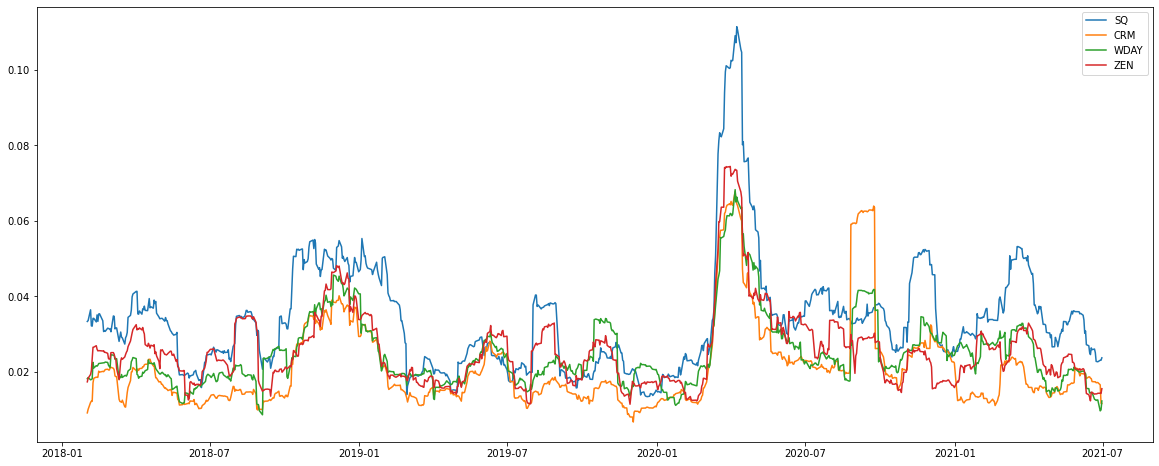

In [15]:
# Rolling Standard deviation 2018-2020
SaaS_std = SaaS_daily_returns.rolling(window=21).std()
SaaS_std.plot(figsize=(20,8))

In [18]:
csv_path = Path("SaaS_Total_Revenues.csv")
SaaS_rev_data = pd.read_csv(csv_path)
Saas_rev_data = pd.DataFrame(SaaS_rev_data)
Saas_rev_data

,Ticker,2017,2018,2019,2020
0,SQ,2214253,3298177,4713500,9497578
1,CRM,10480012,13282000,17098000,21252000
2,WDAY,2143050,2822180,3627206,4317996
3,ZEN,430492,598746,816416,1029564


<AxesSubplot:title={'center':'Total Revenue'}, xlabel='Ticker'>

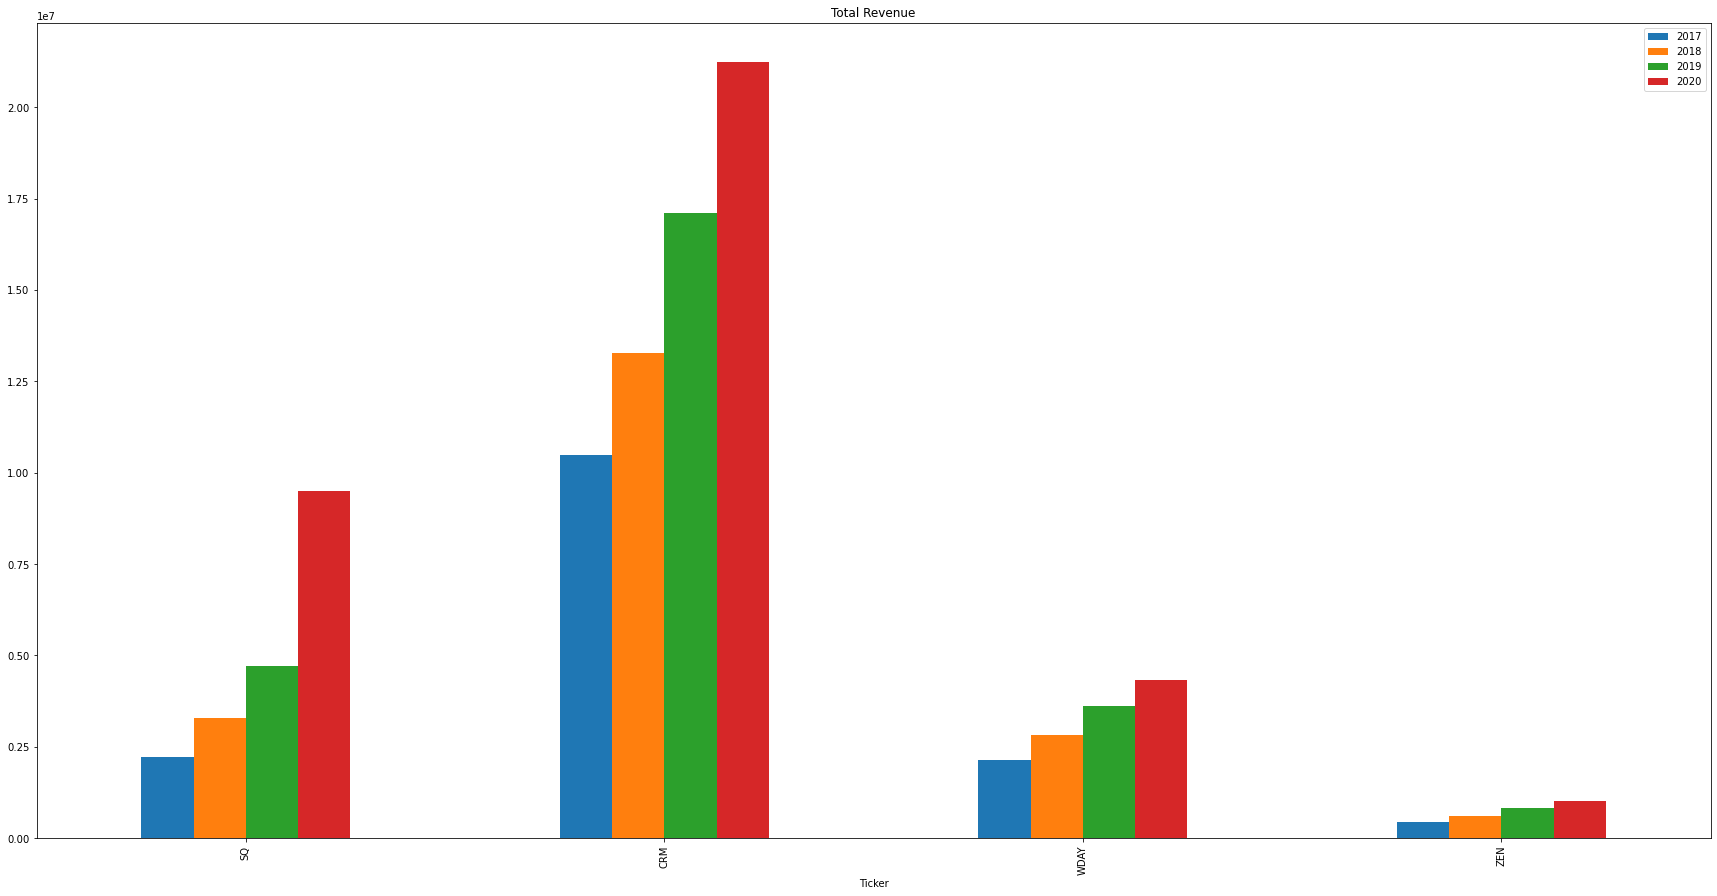

In [19]:
SaaS_rev = SaaS_rev_data
SaaS_rev = SaaS_rev.set_index("Ticker")
SaaS_rev.plot(kind="bar", title="Total Revenue", figsize=(30,15))